## Installing and importing relevant libraries

First step in doing this analysis is to installing and importing the relevant libraries that we're gonna use for this project

In [243]:
pip install pandas matplotlib numpy seaborn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [244]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

## Transforming the CSV into a usable dataframe

After the first step, we'll now transform our raw CSV into a table format that could be easily read by our code through using a Pandas library. 

In [245]:
# Read CSV file
df = pd.read_csv('/Users/jomarjordas/Documents/analyze-strava/data/activities.csv')

# Change columns into lower case
df.columns=df.columns.str.lower()

df.head()

,activity id,activity date,activity name,activity type,activity description,elapsed time,distance,max heart rate,relative effort,commute,...,average flow,flagged,average elapsed speed,dirt distance,newly explored distance,newly explored dirt distance,activity count,total steps,carbon saved,media
0,3748056394,"Jul 4, 2020, 12:57:37 PM",1st ride,Ride,NaN,636740,2.99,NaN,NaN,False,...,NaN,NaN,NaN,37.500000,NaN,NaN,NaN,NaN,NaN,NaN
1,3748239651,"Jul 11, 2020, 9:51:06 PM",Break-in!,Ride,Still trying to learn how to easily clip in sh...,3789,14.95,NaN,NaN,False,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,media/C1353AD5-C67D-4337-BF05-90FF2D95E9C4.jpg...
2,3979407827,"Aug 28, 2020, 9:45:19 PM",Los Banos attemp,Ride,NaN,2417,8.76,NaN,NaN,False,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,4051298220,"Sep 12, 2020, 10:17:13 PM",UPRHS Ride,Ride,I am so beat. Farthest ride so far on fixed ge...,12127,42.74,NaN,NaN,False,...,NaN,NaN,NaN,357.600006,NaN,NaN,NaN,NaN,NaN,media/1E217299-C6A2-4FD2-AD86-679579B77DEF.jpg
4,4082873705,"Sep 19, 2020, 6:03:41 AM",Budol ride,Ride,Calamba to Los Banos to Bay to Victoria to Cal...,31880,55.75,NaN,NaN,False,...,NaN,NaN,NaN,416.399994,NaN,NaN,NaN,NaN,NaN,NaN


## Data Wrangling

The data from Strava contains some fields which we'll not gonna be using for our analysis. Hence, let's trim down and select only those fields that we're particularly interested with

In [246]:
# Checking your data
df.shape

(208, 88)

In [247]:
# Check column names/headers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   activity id                   208 non-null    int64  
 1   activity date                 208 non-null    object 
 2   activity name                 208 non-null    object 
 3   activity type                 208 non-null    object 
 4   activity description          35 non-null     object 
 5   elapsed time                  208 non-null    int64  
 6   distance                      208 non-null    float64
 7   max heart rate                74 non-null     float64
 8   relative effort               74 non-null     float64
 9   commute                       208 non-null    bool   
 10  activity private note         2 non-null      object 
 11  activity gear                 190 non-null    object 
 12  filename                      201 non-null    object 
 13  athle

From using the .shape attribute, we can see that as of 02 March 2024, I've had 202 activities. Strava has provided me with 88 variables that contains the other data gathered from those activties.

Using the .info() method, the names of the column and their data types are now shown to us. However, for this analysis, we'll not gonna be using all of those thus, we shall select only some of those. 

In [248]:
# Selecting relevant columns
cols = ['activity id', 'activity date', 'activity type', 'elapsed time', 'moving time', 'distance',   
         'max heart rate', 'elevation gain', 'max speed', 'calories'
       ]
df = df[cols] 

# Check data types
df.dtypes

activity id         int64
activity date      object
activity type      object
elapsed time        int64
moving time       float64
distance          float64
max heart rate    float64
elevation gain    float64
max speed         float64
calories          float64
dtype: object

In [249]:
df

,activity id,activity date,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories
0,3748056394,"Jul 4, 2020, 12:57:37 PM",Ride,636740,1005.0,2.99,NaN,9.277778,10.800000,NaN
1,3748239651,"Jul 11, 2020, 9:51:06 PM",Ride,3789,3115.0,14.95,NaN,64.584747,17.700001,NaN
2,3979407827,"Aug 28, 2020, 9:45:19 PM",Ride,2417,1564.0,8.76,NaN,12.994913,11.300000,NaN
3,4051298220,"Sep 12, 2020, 10:17:13 PM",Ride,12127,8909.0,42.74,NaN,148.551956,11.400000,NaN
4,4082873705,"Sep 19, 2020, 6:03:41 AM",Ride,31880,12061.0,55.75,NaN,195.563370,11.100000,NaN
...,...,...,...,...,...,...,...,...,...,...
203,10792075458,"Feb 19, 2024, 8:30:41 AM",Virtual Ride,3194,3194.0,17.50,NaN,106.000000,16.459961,320.0
204,10800425730,"Feb 20, 2024, 12:34:27 PM",Virtual Ride,5263,5263.0,34.64,NaN,0.000000,8.654101,510.0
205,10826580353,"Feb 24, 2024, 12:06:46 PM",Virtual Ride,3495,3495.0,22.13,NaN,67.000000,16.631641,369.0
206,10854382367,"Feb 28, 2024, 12:41:06 PM",Virtual Ride,2001,2001.0,13.11,NaN,0.000000,7.574023,191.0


After trimming down our dataframe into a smaller size with less columns, we can now start with some data manipulation to further cleanse and make the data usable for the succeeding codes. 

From the look of the data types, majority of the fields in the dataset are numeric (float64) with some objects which we shall now convert into a date datatype to make it usable for a time series analysis.

We'll use the datetime library to convert my activity date into a date datatype. We can also create some additional variables from activity date, i.e. pulling out the month, year and time, which we will use later in the analysis.

In [250]:
# Convert 'activity date' to DateTime format in-place
df.loc[:, 'activity_date'] = pd.to_datetime(df['activity date'], errors='coerce')

# Create new columns using .loc assignment
df.loc[:, 'start_time'] = df['activity_date'].dt.time
df.loc[:, 'start_date_local'] = df['activity_date'].dt.date
df.loc[:, 'month'] = df['activity_date'].dt.month_name()
df.loc[:, 'year'] = df['activity_date'].dt.year
df.loc[:, 'dayofyear'] = df['activity_date'].dt.dayofyear

# Display the resulting DataFrame
df.head(5)


,activity id,activity date,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories,activity_date,start_time,start_date_local,month,year,dayofyear
0,3748056394,"Jul 4, 2020, 12:57:37 PM",Ride,636740,1005.0,2.99,NaN,9.277778,10.800000,NaN,2020-07-04 12:57:37,12:57:37,2020-07-04,July,2020,186
1,3748239651,"Jul 11, 2020, 9:51:06 PM",Ride,3789,3115.0,14.95,NaN,64.584747,17.700001,NaN,2020-07-11 21:51:06,21:51:06,2020-07-11,July,2020,193
2,3979407827,"Aug 28, 2020, 9:45:19 PM",Ride,2417,1564.0,8.76,NaN,12.994913,11.300000,NaN,2020-08-28 21:45:19,21:45:19,2020-08-28,August,2020,241
3,4051298220,"Sep 12, 2020, 10:17:13 PM",Ride,12127,8909.0,42.74,NaN,148.551956,11.400000,NaN,2020-09-12 22:17:13,22:17:13,2020-09-12,September,2020,256
4,4082873705,"Sep 19, 2020, 6:03:41 AM",Ride,31880,12061.0,55.75,NaN,195.563370,11.100000,NaN,2020-09-19 06:03:41,06:03:41,2020-09-19,September,2020,263


Next thing to do is to
1. Convert the data type of the distance column from being an object into numeric so that it would easier to manipulate.
2. We'll add some additional columns to show the metrics which were not shown in the dataframe that we have so far.
3. Lastly, we'll inspect if the changes that we did were already applied in the resulting dataframe.

In [251]:
# Converting distance from object to numeric
df.loc[:, 'distance'] = pd.to_numeric(df['distance'], errors='coerce')

# Create new columns using .loc assignment
df.loc[:, 'elapsed hour'] = (df['elapsed time'] / 60)/60
df.loc[:, 'km per hour'] = df['distance'] / df['elapsed hour']

# Inspecting data types after manipulation
df.dtypes

activity id                  int64
activity date               object
activity type               object
elapsed time                 int64
moving time                float64
distance                   float64
max heart rate             float64
elevation gain             float64
max speed                  float64
calories                   float64
activity_date       datetime64[ns]
start_time                  object
start_date_local            object
month                       object
year                         int32
dayofyear                    int32
elapsed hour               float64
km per hour                float64
dtype: object

In [252]:
# Check activity count
df['activity type'].value_counts()

activity type
Ride            138
Virtual Ride     58
Workout           5
Run               3
Walk              2
Hike              1
Virtual Run       1
Name: count, dtype: int64

Next step in this analysis to select which kind of activity will we conduct the analysis into. The above shows the kinds of activity that we have logged into Strava. Since 2020, I did 'Ride' the most with 138 records. 'Ride' is the activity type when I ride my bike outside and not through my trainers.

In the code below, we shall then select ride which will make it perfect for making an analysis.

In [253]:
# Selecting the specific type of activity to be used for the analysis
ride = df[df['activity type'] == 'Ride']

# Exploratory Data Analysis

After cleaning the data, we can now finally proceed on analyzing and creating insights from my Strava rides. 

We'll start by showing the summary statistics table for ease of inspecting the usual statistical values that we're interested with. 

Afterwards, we'll create a pairs plot chat which will illustrate the distribution of the variables and its relationship with the other variables. 

Then we'll create a box-plot to visually show the dispertion of my ride data and if there are signs of skewness.

We'll the proceed with illustrating the distance per month that I've covered through a bar plot. 

Lastly, we shall make another box-plot to see which quarter am I most actively riding my bike outdoors

In [254]:
# Summary statistics
ride.describe().round(0)

,activity id,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories,activity_date,year,dayofyear,elapsed hour,km per hour
count,1.380000e+02,138.0,138.0,138.0,34.0,138.0,138.0,86.0,138,138.0,138.0,138.0,138.0
mean,6.892066e+09,38999.0,6876.0,34.0,176.0,155.0,12.0,1078.0,2022-03-18 23:33:04.362318848,2022.0,228.0,11.0,12.0
min,3.748056e+09,171.0,171.0,1.0,118.0,0.0,5.0,20.0,2020-07-04 12:57:37,2020.0,14.0,0.0,0.0
25%,5.807027e+09,2619.0,1843.0,9.0,171.0,32.0,10.0,277.0,2021-08-17 06:39:24.750000128,2021.0,168.0,1.0,8.0
50%,7.058098e+09,7865.0,4951.0,25.0,178.0,104.0,12.0,579.0,2022-04-29 05:08:36,2022.0,232.0,2.0,11.0
75%,8.008873e+09,20309.0,9597.0,45.0,181.0,192.0,14.0,1239.0,2022-10-23 22:42:44,2022.0,299.0,6.0,14.0
max,1.056717e+10,3055629.0,38296.0,210.0,241.0,982.0,23.0,7699.0,2023-12-29 05:53:09,2023.0,365.0,849.0,52.0
std,1.535680e+09,264373.0,6911.0,35.0,18.0,178.0,3.0,1311.0,NaN,1.0,89.0,73.0,6.0


The good thing about showing the summary statistics first is that you'll immediately see if there are some extreme and funky values through showing the minimum and maximum values. In my data, it can be observed my maximum elapsed time was 8489rs (Calculated as =3055629/60mins/60hrs) for which I couldn't think of any ride that I made where I was on the bike for that long. However, for the moving time, my max was at 10.63 hrs which was when I did my first Laguna Loop. 

Another funky value was my max heart rate which peaked at 241bpm? I don't have the best heart condition but I'm pretty sure that I won't reach that high of a heart rate. 

Those two might have skewed my data hence, I think we should exclude those before even proceeding with the other charts and analysis. As I recall, I haven't made an activity which lasted for more than 20 hours. With regard to my max heartrate, there were times that my heart rate monitor was acting strange that's why some of the readings were off. The max reasonable heart rate that I could recall was at 210bpm. Hence, I will set another filter to not include those rides with heart rate greater than 210bpm.

In [255]:
ride = ride[ride['elapsed hour'] <= 20]
ride = ride[(ride['max heart rate'] <= 210) | ride['max heart rate'].isna()]
ride

,activity id,activity date,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories,activity_date,start_time,start_date_local,month,year,dayofyear,elapsed hour,km per hour
1,3748239651,"Jul 11, 2020, 9:51:06 PM",Ride,3789,3115.0,14.95,NaN,64.584747,17.700001,NaN,2020-07-11 21:51:06,21:51:06,2020-07-11,July,2020,193,1.052500,14.204276
2,3979407827,"Aug 28, 2020, 9:45:19 PM",Ride,2417,1564.0,8.76,NaN,12.994913,11.300000,NaN,2020-08-28 21:45:19,21:45:19,2020-08-28,August,2020,241,0.671389,13.047580
3,4051298220,"Sep 12, 2020, 10:17:13 PM",Ride,12127,8909.0,42.74,NaN,148.551956,11.400000,NaN,2020-09-12 22:17:13,22:17:13,2020-09-12,September,2020,256,3.368611,12.687722
4,4082873705,"Sep 19, 2020, 6:03:41 AM",Ride,31880,12061.0,55.75,NaN,195.563370,11.100000,NaN,2020-09-19 06:03:41,06:03:41,2020-09-19,September,2020,263,8.855556,6.295483
5,4086191939,"Sep 20, 2020, 9:53:22 AM",Ride,284,284.0,0.72,NaN,3.209000,7.700000,NaN,2020-09-20 09:53:22,09:53:22,2020-09-20,September,2020,264,0.078889,9.126761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,9990515464,"Oct 6, 2023, 11:22:57 PM",Ride,6292,6222.0,36.45,179.0,301.000000,13.755957,1240.0,2023-10-06 23:22:57,23:22:57,2023-10-06,October,2023,279,1.747778,20.855054
191,10100189343,"Oct 25, 2023, 5:57:43 AM",Ride,249,249.0,0.88,NaN,13.000000,6.693994,33.0,2023-10-25 05:57:43,05:57:43,2023-10-25,October,2023,298,0.069167,12.722892
192,10110804074,"Oct 26, 2023, 9:27:51 PM",Ride,10167,6923.0,38.80,178.0,346.000000,14.372070,1142.0,2023-10-26 21:27:51,21:27:51,2023-10-26,October,2023,299,2.824167,13.738566
194,10386367323,"Dec 15, 2023, 11:27:39 PM",Ride,2055,1802.0,8.82,168.0,59.000000,11.894043,286.0,2023-12-15 23:27:39,23:27:39,2023-12-15,December,2023,349,0.570833,15.451095


After excluding those activities, we are now down to 135 records from having 138 records to start with. 

We can now proceed into visualizing my data into pairs plots, box-plot, and bar charts.

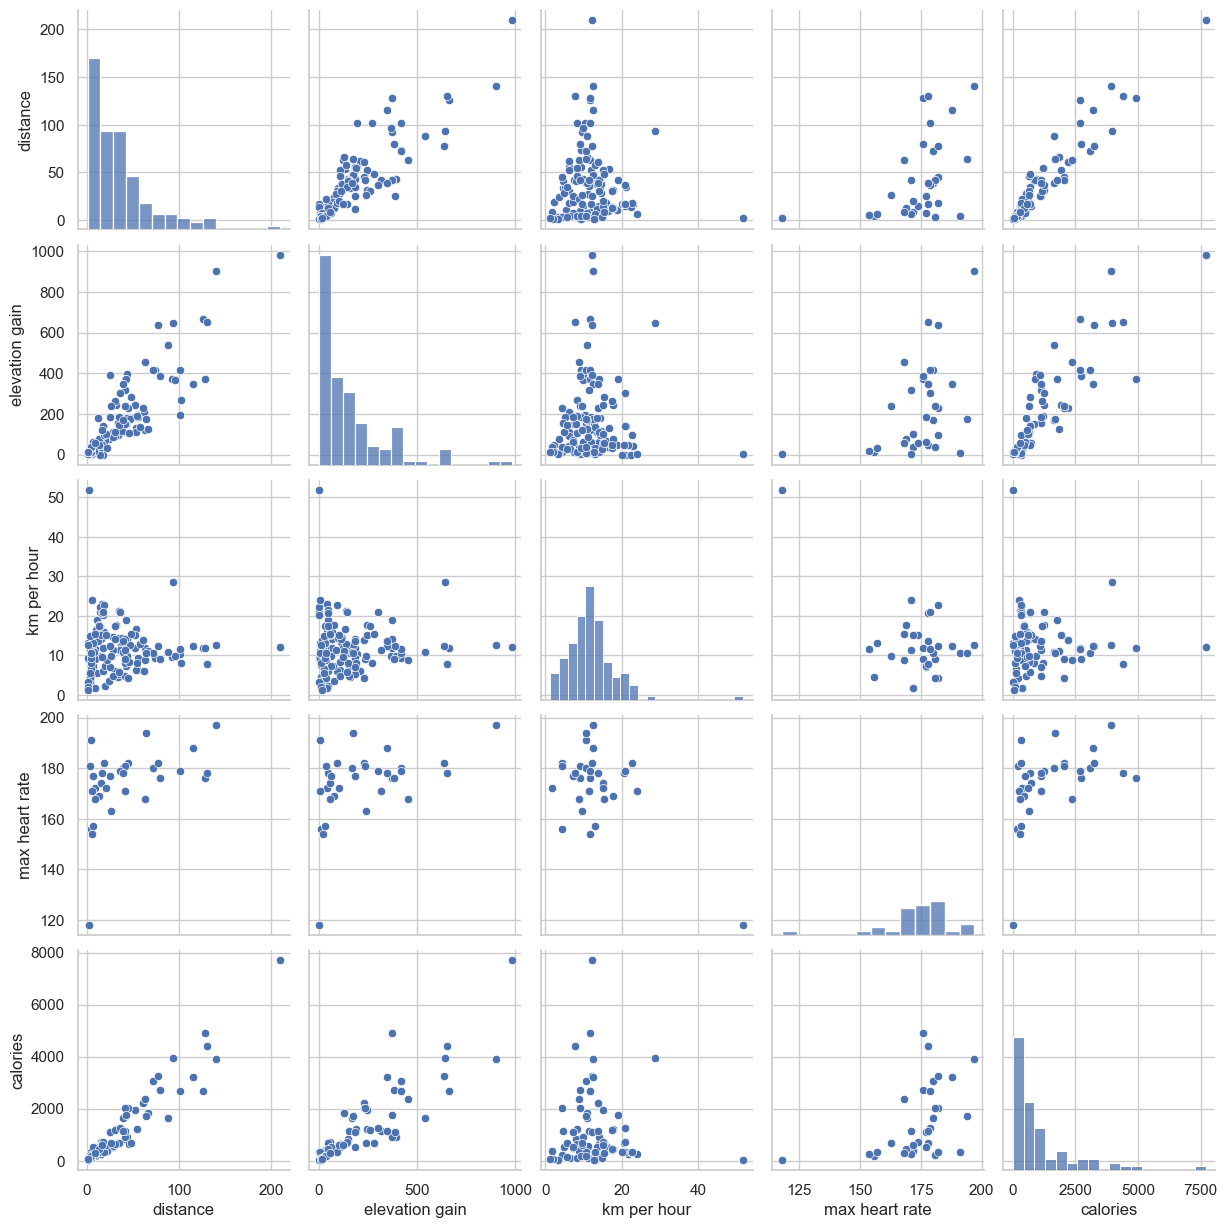

In [256]:
# Creating pair plots
pp_df = ride[['distance', 'elevation gain', 'km per hour', 'max heart rate', 'calories']]
sns.pairplot(pp_df);


Using a pairs plot really is very useful as it gives you immediate visualization amongst the variables that you wanted to have an analysis with. 

As expected, we can observe that there is a positive relationship between distance and calories -- the longer the distance, the higher number of calories burned. 

For most of my rides under 100km, I've kept my speed under 30km/hr. 

And for those rides where I was able to record my heartrate, I was over 160bpm for most of them. This is definitely something that I can improve as I wanted to keep my efforts in Zone 2. And perhaps, I should replace my heart rate monitor. 

Next stop is making a box-plot chart for the distance I've covered.

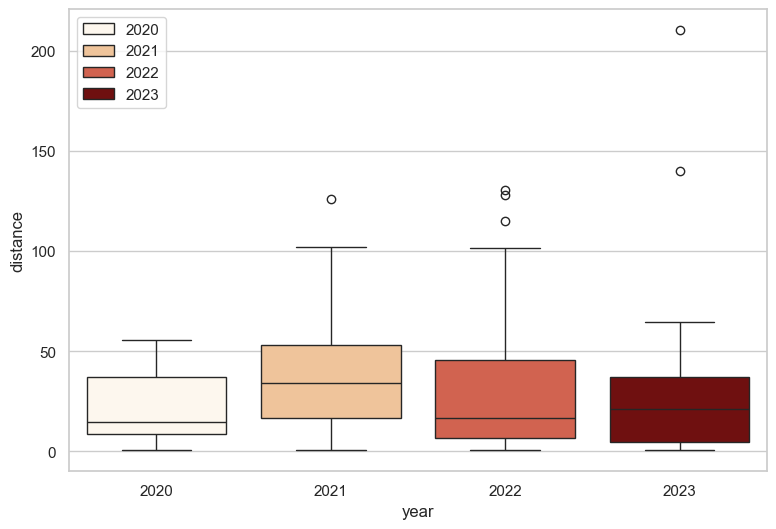

In [257]:
# Inspecting dispersion of data
fig, ax = plt.subplots()
sns.set(style="whitegrid", font_scale=1)

# Use the "OrRd" palette and set legend=True for automatic legend creation
sns.boxplot(
    x="year",
    y="distance",
    hue="year",
    data=ride,
    palette="OrRd",  # Set the color palette
    legend=True  # Add legend
)

# Remove unnecessary legend items (since legend is already added with hue)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:])  # Keep only the second legend item

plt.gcf().set_size_inches(9, 6)
plt.show()

First observation that immediately struct me is the lack of 2024 data. Then I realized that I wasn't able to record a bike ride outside as of writing this because I've suffered from a gout attack at the start of the year. I've mostly had indoor rides this year so far. 

Extremes was highest during 2023 where I did my Audax Populaire event in January (140km) and a Laguna Loop ride (>200km). In the previous years however, the distance of the rides that I do mostly range upto 100km with the majority being under 50km.

We now proceed into illustrating the total distance that I've covered on a monthly basis.

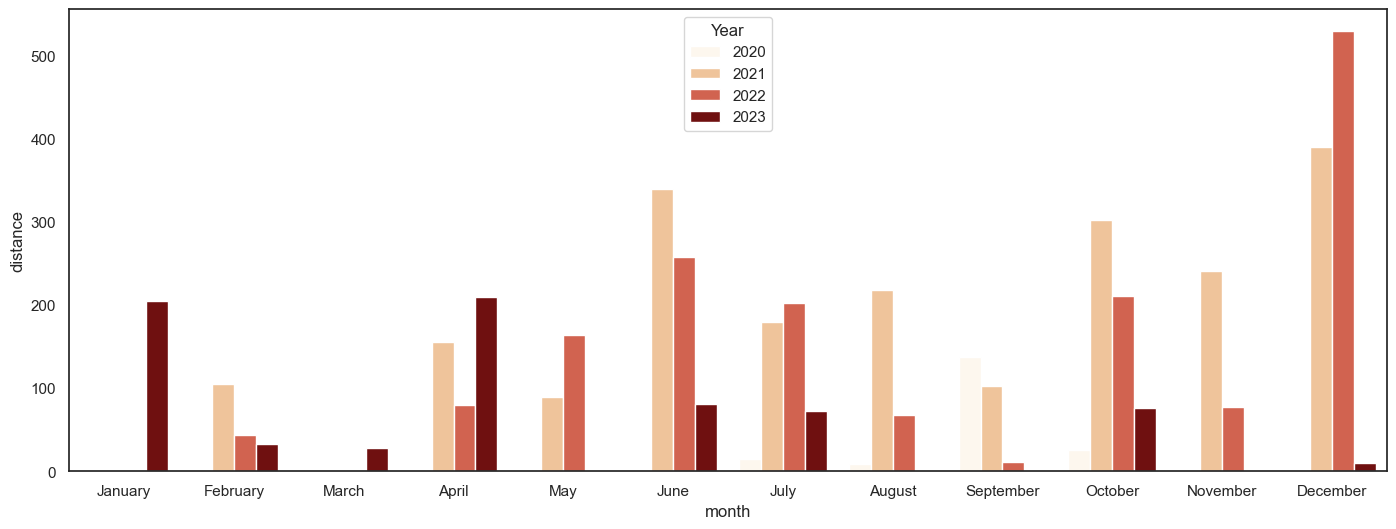

In [258]:
# Set the background style to white
sns.set_style('white')

# Define the cooler color palette
palette = "OrRd"

# Create the bar plot
sns.barplot(
    x='month',
    y='distance',
    data=ride,
    hue='year',
    errorbar=None,  # Use errorbar=None instead of ci
    estimator=np.sum,
    palette=palette,  # Use the defined cooler palette
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)

# Set figure size
plt.gcf().set_size_inches(17, 6)

# Add and customize the legend
plt.legend(loc='upper center', title='Year')  # Add a title to the legend

plt.show()

Here, the total distance I covered per month was shown. there were no data for the first half of 2020 as I started recording my rides when I got my fixed gear in July. 

The most that I've done was during the December 2022 when I completed the Rapha Festive 500 challenge. 

I guess the best insight I wanted to make out of this is that I should ride more outside. 

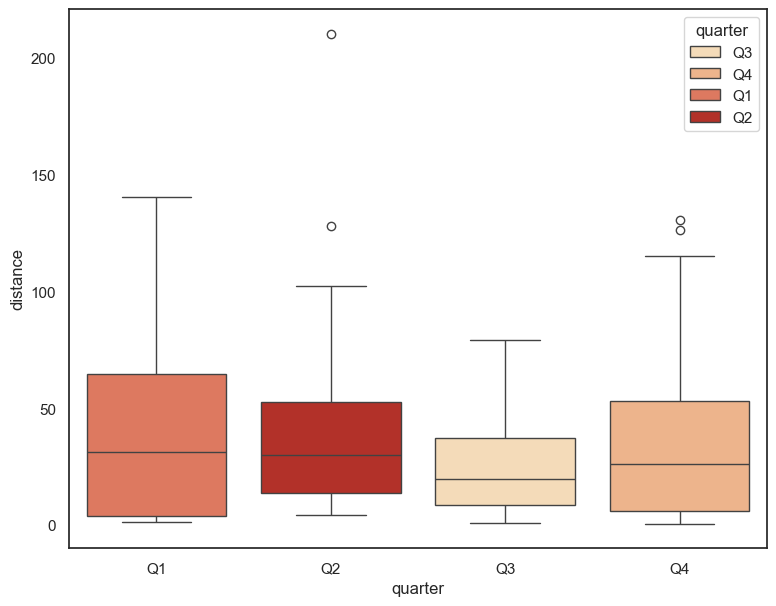

In [259]:
# Create a copy of the DataFrame 
ride_copy = ride.copy()

# Define valid months (adjust as needed)
valid_months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

# Handle missing or invalid month values using np.where:
ride_copy['quarter'] = np.where(ride_copy["month"].isin(valid_months),
                                ride_copy["month"].replace({
                                    "January": "Q1",
                                    "February": "Q1",
                                    "March": "Q1",
                                    "April": "Q2",
                                    "May": "Q2",
                                    "June": "Q2",
                                    "July": "Q3",
                                    "August": "Q3",
                                    "September": "Q3",
                                    "October": "Q4",
                                    "November": "Q4",
                                    "December": "Q4"
                                }), "unknown")

# Creating a new boxplot to visualize per quarter
ax = sns.boxplot(x="quarter", y="distance", hue="quarter", 
                 data=ride_copy, order=["Q1", 'Q2', 'Q3', 'Q4'],
                 palette="OrRd", legend=True) 

plt.gcf().set_size_inches(9, 7)

plt.show()

And lastly, we have a box-plot for the quarterly analysis. Given the chart, it can be observed that I ride the most during the first quarter of the year. Again, I should really ride more outside. 

Thank you for going through this simple exploratory data analysis project that I did. I enjoyed coding this and generating insights from my cycling data. I plan to further improve this in the future and perhaps with better data after I replace my heart rate monitor. Please feel free to use this if you wanted to do a simple analysis on your cycling data as well. 